<h1 align=center><font size = 5>Capstone Project</font></h1>
<h1 align=center><font size = 5>FLATTENING THE CURVE AS ECONOMIC ACTIVITIES RESUME: LOCATION DATA ANALYSIS OF LAGOS STATE IN REFERENCE TO THE COVID 19 PANDEMIC</font></h1>

<h1 align=center><font size = 5>Applied Data Science Capstone by IBM/Coursera</font></h1>

## Table of contents
* [Introduction: Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Problem <a name="introduction"></a>

The COVID-19 pandemic has proven to be a threat to the economy of Lagos state and the health of it's populace. As the epicentre of the COVID-19 pandemic in Nigeria, the state had 57.77% of the number of active cases in the country as at 27 April 2020. Also, as the business capital of the country, it has been the most affected economically.

After a 4-week lockdown, the president of the Federal Republic of Nigeria announced a one week extension on 27 April, 2020; after which the lockdown will be eased. Thus, it is expected that the city of Lagos will re -open on 04 May 2020.

Considering the fact that Lagos is the state with the highest population density in Nigeria, the question on everyone's mind is : How is Lagos state going to flatten the curve while allowing economic activities to take place?

This project will involve the use of location data of the twenty (20) LGAs in Lagos state and their COVID-19 distribution to identify venues that require strict focus in terms of public health measures to curb the spread. The idea is to curb the spread of COVID-19 in the most common venues in the LGAs as economic activities resume. 

**Aim of the Project:** The aim of this project is to develop strategies based on location data analysis, to reduce the spread of COVID-19 virus in Lagos state as the state resumes economic activities.

**OBJECTIVES:** The objectives of this project are as follows:
1.	Identification of Lagos state Local Government Areas (LGAs) most affected by the COVID-19 virus.
2.	Exploration of location data of LGAs with the highest COVID-19 cases using Foursquare API.
3.	Segmenting and clustering of LGAs to identify defining features in relation to COVID -19 spread by leveraging on Foursquare location data.
4.	Development of strategies to reduce the spread of the virus based on the results of the analysis. 

**Target Audience:** The target audience for this report include the following:
1.	The Lagos State Government.
2.	Nigeria Center for Disease and Control(NCDC) and the Federal Government.
3.	Chief Executives and Business Owners.
4.	Lagos State Residents.
5.	Data Scientists and Public Health Scientists.

## Data <a name="data"></a>

Based on the definition of the problem, data needed to achieve the objectives of the project are:
    
* Lagos State Local Government Area (LGA) Data
* Distribution of COVID-19 cases across LGAs
* Geographical coordinates of the LGAs
* Location data of various venues in the 20 LGAs in Lagos state

## Data Sources:

The data required would be sourced from the following:
* "Local government areas" from Wikipedia: https://https://en.wikipedia.org/wiki/Lagos_State#Local_government_areas. This data provides the list of all the 20 LGAs and their population.
* Distribution of COVID-19 cases across LGAs as at 18 April 2020 from Wiki File: COVID-19 cases in the Lagos Metropolitan Area.jpg. https://commons.wikimedia.org/wiki/File:COVID-19_cases_in_the_Lagos_Metropolitan_Area.jpg. The number of cases per LGAs would be extracted manually, as it is in JPG format; this is also the only data available with traceable source on the number of cases per LGA as at the time of the analysis.
* Geopy: A Python 2 and 3 client for several popular geocoding web services. This will be used to get the geographical coordinates of the LGAs.
* Foursquare API: to get information about the various venues in Lagos state by LGAs.

## Data Acquisition and Cleaning

The goal of the data acquisition and cleaning is to have a dataframe containing the LGAs, COVID-19 cases, Population, Latitude and Longitude values and location data. 

This will be achieved through the following steps:

* The web page on the LGA data will scraped using the Wikipedia API and read into a pandas dataframe.
* Data on distribution of COVID-19 cases across LGAs will be manually extracted from the wiki image file and merged as a new column ('COVID-19 cases') to the dataframe. 
* The Nominatim function grom geopy.geocoders will be used to get the geographical coordinates of the LGAs which will be merged with the data.
* Foursquare API will be used to get location data on the LGAs

**We start by importing all the libraries needed for this analysis.**

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # for ggplot-like style

!conda install -c anaconda seaborn --yes

import seaborn as sns

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

import urllib.request
!conda install lxml --yes
%pip install Wikipedia
import wikipedia as wp

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

## Web Scraping

**Data on Lagos state LGAs will be scraped from Wikipedia page using the installed Wikipedia API.**

In [3]:
url = "https://en.wikipedia.org/wiki/Lagos_State#Local_government_areas"
page = urllib.request.urlopen(url)
html = wp.page("Lagos_State#Local_government_areas").html().encode("UTF-8")
df = pd.read_html(html, header =0)[2]
df

,Rank,LGA,Population
0,1.0,Alimosho,5700714
1,2.0,Ajeromi-Ifelodun,1746634
2,3.0,Kosofe,665421
3,4.0,Mushin,633543
4,5.0,Oshodi-Isolo,10621789
5,6.0,Ojo,598332
6,7.0,Ikorodu,535811
7,8.0,Surulere,504409
8,9.0,Agege,461123
9,10.0,Ifako-Ijaiye,428812


In [4]:
df.shape

(21, 3)

The data consist of the list and population size of all 20 LGAs in Lagos state.

We will need to drop the last row as it is NaN, it is the total of the population in Lagos state and is not needed for the analysis.

In [5]:
df.drop(df[df['LGA']=='Lagos State'].index, inplace = True) 
df

,Rank,LGA,Population
0,1.0,Alimosho,5700714
1,2.0,Ajeromi-Ifelodun,1746634
2,3.0,Kosofe,665421
3,4.0,Mushin,633543
4,5.0,Oshodi-Isolo,10621789
5,6.0,Ojo,598332
6,7.0,Ikorodu,535811
7,8.0,Surulere,504409
8,9.0,Agege,461123
9,10.0,Ifako-Ijaiye,428812


It is important to check the types of the data to be sure population is type integer.

In [6]:
df.dtypes

Rank          float64
LGA            object
Population     object
dtype: object

The output shows Population is string type, this means we have to change it to type integer by running the code below:

In [7]:
df['Population'] = df['Population'].astype(int)
df.dtypes

Rank          float64
LGA            object
Population      int64
dtype: object

Now that the data contains the right types, it is necessary to drop unnecessary columns, in this case 'Rank'.

In [8]:
df.drop(['Rank'], axis=1, inplace = True)
df.columns

Index(['LGA', 'Population'], dtype='object')

As highlighted above, the data on COVID-19 case distribution across Lagos state LGAs is only available as an image file in Wikipedia. 

Thankfully, there are only 20 LGAs so we can manually extract the figures. We start by downloading the file from Wikipedia.

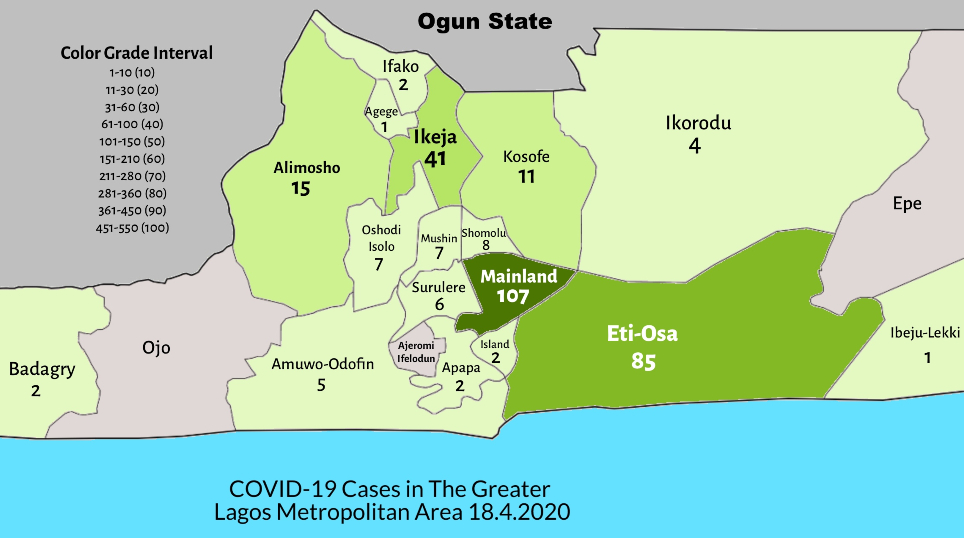

In [9]:
from IPython.display import Image 

Image("https://upload.wikimedia.org/wikipedia/commons/7/7a/COVID-19_cases_in_the_Lagos_Metropolitan_Area.jpg")

Let's extract the figure into a list assigned to 'COVID19_Cases' and create a new column for it in the dataframe.

In [10]:
COVID19_Cases = [15, 0, 11, 7, 7, 0, 4, 6, 1, 2, 8, 5, 107, 41, 85, 2, 2, 2, 0, 1]
df['COVID19_Cases']= COVID19_Cases
df

,LGA,Population,COVID19_Cases
0,Alimosho,5700714,15
1,Ajeromi-Ifelodun,1746634,0
2,Kosofe,665421,11
3,Mushin,633543,7
4,Oshodi-Isolo,10621789,7
5,Ojo,598332,0
6,Ikorodu,535811,4
7,Surulere,504409,6
8,Agege,461123,1
9,Ifako-Ijaiye,428812,2


Now we have the LGA dataframe with COVID-19 Case distribution.

## Extraction of Geographical Coordinates of LGAs

Using Geopy, let's extract the latitude and longitude values of the LGAs.

However, to ensure that the coordinates are correctly extracted, it is necessary to specify the location of the LGAs. I will do this by creating a column which specifies that the LGAs are in Lagos state.

In [11]:
Address = df.LGA + ',Lagos'
df['Address']= Address
df

,LGA,Population,COVID19_Cases,Address
0,Alimosho,5700714,15,"Alimosho,Lagos"
1,Ajeromi-Ifelodun,1746634,0,"Ajeromi-Ifelodun,Lagos"
2,Kosofe,665421,11,"Kosofe,Lagos"
3,Mushin,633543,7,"Mushin,Lagos"
4,Oshodi-Isolo,10621789,7,"Oshodi-Isolo,Lagos"
5,Ojo,598332,0,"Ojo,Lagos"
6,Ikorodu,535811,4,"Ikorodu,Lagos"
7,Surulere,504409,6,"Surulere,Lagos"
8,Agege,461123,1,"Agege,Lagos"
9,Ifako-Ijaiye,428812,2,"Ifako-Ijaiye,Lagos"


Now let's run the code below to extract the latitude and longitude values and merge them to the LGA dataframe.

In [12]:
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="lag_explorer")

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude','altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df

,LGA,Population,COVID19_Cases,Address,location,point,latitude,longitude,altitude
0,Alimosho,5700714,15,"Alimosho,Lagos","(Alimosho, Lagos, Nigeria, (6.58434295, 3.2576...","(6.58434295, 3.257631097232365, 0.0)",6.584343,3.257631,0.0
1,Ajeromi-Ifelodun,1746634,0,"Ajeromi-Ifelodun,Lagos","(Ajeromi/Ifelodun, Lagos, Nigeria, (6.45512169...","(6.455121699999999, 3.3359462518298724, 0.0)",6.455122,3.335946,0.0
2,Kosofe,665421,11,"Kosofe,Lagos","(Kosofe, Lagos, 100234, Nigeria, (6.5819740000...","(6.581974000000001, 3.4148359416178415, 0.0)",6.581974,3.414836,0.0
3,Mushin,633543,7,"Mushin,Lagos","(Mushin, Lagos, Nigeria, (6.5326324499999995, ...","(6.5326324499999995, 3.3520219717987674, 0.0)",6.532632,3.352022,0.0
4,Oshodi-Isolo,10621789,7,"Oshodi-Isolo,Lagos","(Oshodi/Isolo, Lagos, 100263, Nigeria, (6.5400...","(6.5400100000000005, 3.312414613183944, 0.0)",6.540010,3.312415,0.0
5,Ojo,598332,0,"Ojo,Lagos","(Ojo, Lagos, Nigeria, (6.46249745, 3.165706414...","(6.46249745, 3.165706414364106, 0.0)",6.462497,3.165706,0.0
6,Ikorodu,535811,4,"Ikorodu,Lagos","(Ikorodu, Lagos, 104213, Nigeria, (6.6191233, ...","(6.6191233, 3.5041271, 0.0)",6.619123,3.504127,0.0
7,Surulere,504409,6,"Surulere,Lagos","(Surulere, Lagos, 101212, Nigeria, (6.48720145...","(6.487201450000001, 3.353258726723983, 0.0)",6.487201,3.353259,0.0
8,Agege,461123,1,"Agege,Lagos","(Agege, Lagos, Nigeria, (6.6252564, 3.31120926...","(6.6252564, 3.311209267702652, 0.0)",6.625256,3.311209,0.0
9,Ifako-Ijaiye,428812,2,"Ifako-Ijaiye,Lagos","(Ziggies Pool, Alhaji Bashiru Shittu Street, M...","(6.623094549999999, 3.372504630485881, 0.0)",6.623095,3.372505,0.0


Now that we have our full data, we can drop unnecessary columns from the geopy data.

In [13]:
df.drop(['Address', 'location', 'point', 'altitude'], axis=1, inplace = True)
df

,LGA,Population,COVID19_Cases,latitude,longitude
0,Alimosho,5700714,15,6.584343,3.257631
1,Ajeromi-Ifelodun,1746634,0,6.455122,3.335946
2,Kosofe,665421,11,6.581974,3.414836
3,Mushin,633543,7,6.532632,3.352022
4,Oshodi-Isolo,10621789,7,6.540010,3.312415
5,Ojo,598332,0,6.462497,3.165706
6,Ikorodu,535811,4,6.619123,3.504127
7,Surulere,504409,6,6.487201,3.353259
8,Agege,461123,1,6.625256,3.311209
9,Ifako-Ijaiye,428812,2,6.623095,3.372505


## Data Visualisation

Let's create a map of Lagos state, Nigeria with the LGAs superimposed on it.

I start by getting the latitude and longitude values for Lagos.

In [14]:
address_ = 'Lagos, Nigeria'

geolocator = Nominatim(user_agent="lag_explorer")
location = geolocator.geocode(address_)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Lagos State are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Lagos State are 6.4550575, 3.3941795.


In [15]:
map_Lagos = folium.Map(location=[latitude, longitude], zoom_start=10)

# the codes below are to add markers to map
for lat, lng, LGA, COVID19_Cases in zip(df['latitude'], df['longitude'], df['LGA'], df['COVID19_Cases']):
    label = '{},{}'.format(LGA, COVID19_Cases)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Lagos)  
    
map_Lagos

The markers show the location of the LGAs on the map

### Data Distribution

Using Bar charts, let's visualise the distribution of the data.

First, it would be safe to create a copy of the data for plotting so as not to make changes on the original data.

In [16]:
df_plot=df.copy()

Using Bar charts, we would view the distribution of the data. For this to happen, LGA has to be set as the index.

In [17]:
df_plot.set_index('LGA', inplace=True)
df_plot.head()

,Population,COVID19_Cases,latitude,longitude
LGA,,,,
Alimosho,5700714,15,6.584343,3.257631
Ajeromi-Ifelodun,1746634,0,6.455122,3.335946
Kosofe,665421,11,6.581974,3.414836
Mushin,633543,7,6.532632,3.352022
Oshodi-Isolo,10621789,7,6.540010,3.312415


Let us confirm that the original dataset is still intact.

In [18]:
df.head()

,LGA,Population,COVID19_Cases,latitude,longitude
0,Alimosho,5700714,15,6.584343,3.257631
1,Ajeromi-Ifelodun,1746634,0,6.455122,3.335946
2,Kosofe,665421,11,6.581974,3.414836
3,Mushin,633543,7,6.532632,3.352022
4,Oshodi-Isolo,10621789,7,6.540010,3.312415


**Bar Plot of Population Distribution across LGAs**

In [19]:
df_plot_pop=df_plot[['Population']]
df_plot_pop.head()

,Population
LGA,
Alimosho,5700714
Ajeromi-Ifelodun,1746634
Kosofe,665421
Mushin,633543
Oshodi-Isolo,10621789


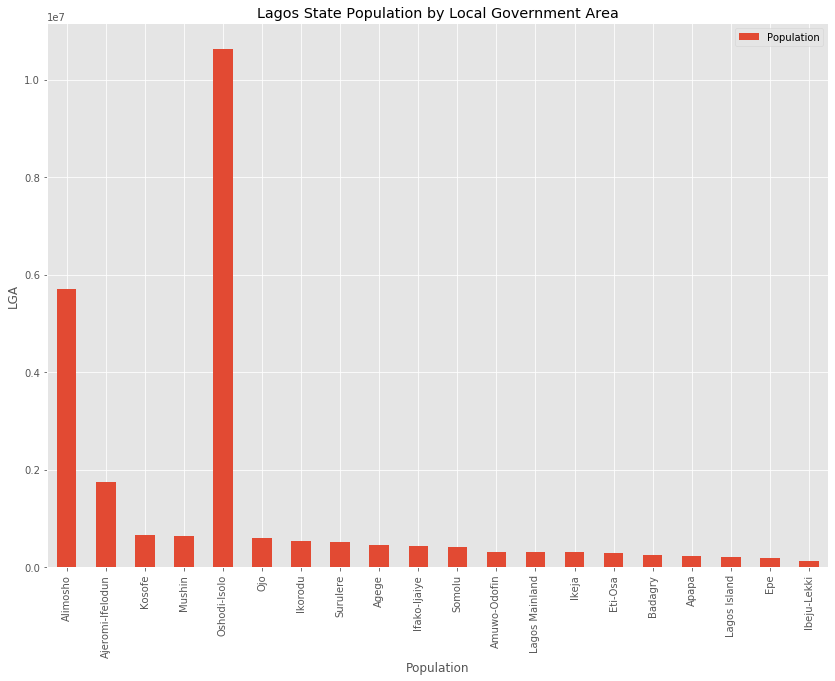

In [20]:
df_plot_pop.plot(kind='bar', figsize=(14, 10))

plt.xlabel('Population') # add to x-label to the plot
plt.ylabel('LGA') # add y-label to the plot
plt.title('Lagos State Population by Local Government Area') # add title to the plot

plt.show()


The bar chart shows that Oshodi-Isolo LGA is the most populated followed by Alimosho and then Ajeromi-Ifelodun LGA.

Let's compare the COVID-19 Case distribution among the LGAs

**Bar plot of COVID-19 Cases across LGAs**

In [21]:
df_plot_cases=df_plot[['COVID19_Cases']]
df_plot_cases.head()

,COVID19_Cases
LGA,
Alimosho,15
Ajeromi-Ifelodun,0
Kosofe,11
Mushin,7
Oshodi-Isolo,7


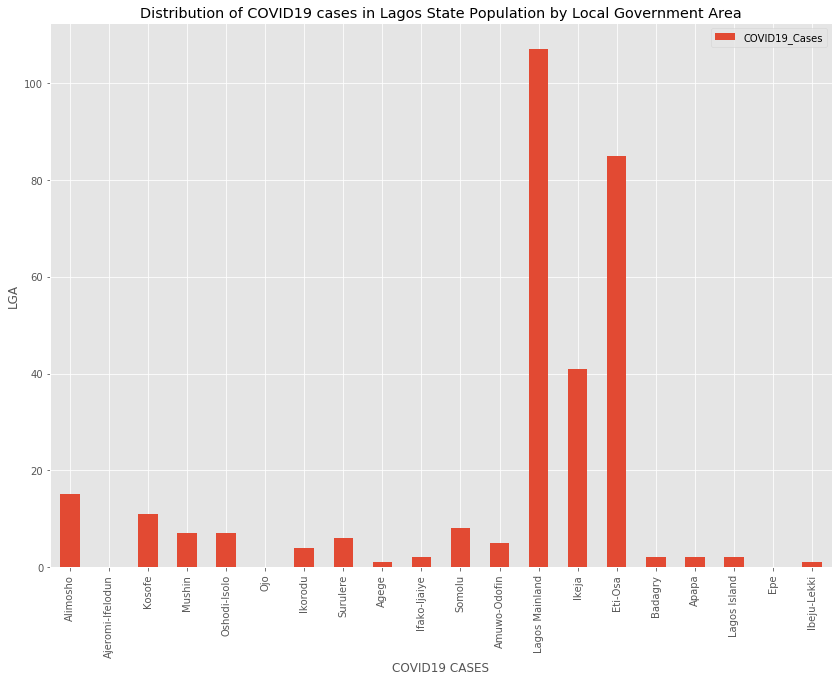

In [22]:
df_plot_cases.plot(kind='bar', figsize=(14, 10))

plt.xlabel('COVID19 CASES') # add to x-label to the plot
plt.ylabel('LGA') # add y-label to the plot
plt.title('Distribution of COVID19 cases in Lagos State Population by Local Government Area') # add title to the plot

plt.show()


The bar chart shows that Lagos Mainland has the highest number of COVID-19 cases followed by Eti-Osa local Government and Ikeja LGA. 

It can be said the population of the LGA is not related to the number of COVID-19 cases just by comparing the charts, however it is better to confirm this by using a regression plot.

**Seaborn Regression plot of the relationship between population in LGAs and the number of COVID-19 cases**

Text(0.5, 1.0, 'Relationship between Population and Number of COVID-19 cases in Lagos')

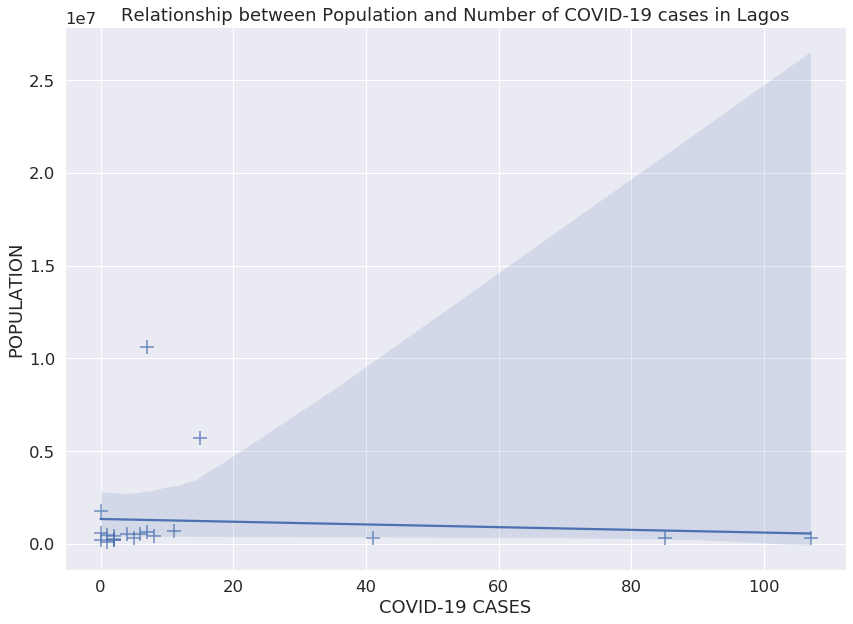

In [23]:
plt.figure(figsize=(14, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='COVID19_Cases', y='Population', data=df_plot, marker='+', scatter_kws={'s': 200})
ax.set(xlabel='COVID-19 CASES', ylabel='POPULATION')
ax.set_title('Relationship between Population and Number of COVID-19 cases in Lagos')


The regression plot shows that there is no linear relationship between population and COVID-19 cases. This means that the sharp difference between the number of COVID-19 cases for the three LGAs with the highest number of cases and the other LGAs must be because of other factors. 

We would see if we can get these factors through location data analysis.

## Exploration of LGA Location Data

This will be done by extracting location data of the LGAs using the **Foursquare API**. 

Foursquare Credentials:

In [24]:
CLIENT_ID = 'A0SH1BHELRM40MDVSDEJIDBNAOHRUN5NZGMOSOVZ4LZUUIXI'
CLIENT_SECRET = 'TRUGVUP5FVLXNI3YUAM2NAFGG34PAGW0TQ22FHYNKQG10ZM1'
VERSION = '20200429'
print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: A0SH1BHELRM40MDVSDEJIDBNAOHRUN5NZGMOSOVZ4LZUUIXI
CLIENT_SECRET:TRUGVUP5FVLXNI3YUAM2NAFGG34PAGW0TQ22FHYNKQG10ZM1


**Let's start by exploring LGAs with the highest number of COVID19 cases.**

First we find out their indexes, starting with the LGA with the highest number of cases:

In [25]:
df['COVID19_Cases'].argmax()

12

The index for the LGA with the highest number of cases is 12. Using this number, we can confirm the name of the LGA by running the code below:

In [26]:
df.loc[12, 'LGA']

'Lagos Mainland'

Let's explore Lagos Mainland then, first we get the geographical coordinates:

In [27]:
LGA_latitude = df.loc[12, 'latitude']
LGA_longitude = df.loc[12, 'longitude']

LGA_name = df.loc[12, 'LGA']

print('Latitude and longitude values of {} are {}, {}.'.format(LGA_name, 
                                                               LGA_latitude, 
                                                               LGA_longitude))

Latitude and longitude values of Lagos Mainland are 6.49306105, 3.388249637209558.


**Let's get the top 20 venues that are in Lagos Mainland within a radius of 1000 meters.**

In [28]:
LIMIT = 20
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LGA_latitude, 
    LGA_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=A0SH1BHELRM40MDVSDEJIDBNAOHRUN5NZGMOSOVZ4LZUUIXI&client_secret=TRUGVUP5FVLXNI3YUAM2NAFGG34PAGW0TQ22FHYNKQG10ZM1&v=20200429&ll=6.49306105,3.388249637209558&radius=1000&limit=20'

We send the GET request and examine the results

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eaaeaa61d67cb656ae87a63'},
 'response': {'headerLocation': 'Yaba',
  'headerFullLocation': 'Yaba, Lagos',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 6.502061059000009,
    'lng': 3.397290836409439},
   'sw': {'lat': 6.484061040999991, 'lng': 3.379208438009677}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f0f79aae4b02ce1dc67e6fa',
       'name': 'Lounge 17',
       'location': {'lat': 6.488902490650655,
        'lng': 3.384210370384646,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.488902490650655,
          'lng': 3.384210370384646}],
        'distance': 643,
        'cc': 'NG',
        'country': 'Nigeria',
        'formattedAddress': ['Nigeria']

Let's borrow the get_category_type function from the Foursquare lab. This function extracts the category of the venues.

In [30]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The next step is to clean the json and structure it into a pandas dataframe. This involves flattening the json, filtering the columns and categories for each row.

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Lounge 17,BBQ Joint,6.488902,3.384210
1,Blessed Chiebo Enterprise,Women's Store,6.485443,3.388686
2,Adekunle bus stop,Bus Station,6.491712,3.380262
3,Rowe Park,Basketball Court,6.496898,3.380710


In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


Looking at the top venues returned for Lagos Mainland, they are all 'bubbling' spots. Could this be the reason why they have the highest number of COVID-19 cases? Let's check the other two.

Let's repeat the same process for the LGAs with the second and third highest number of COVID-19 Cases, but first we have to determine their indexes by sorting the table.

In [33]:
df.sort_values(by=['COVID19_Cases'], ascending=False)

,LGA,Population,COVID19_Cases,latitude,longitude
12,Lagos Mainland,317980,107,6.493061,3.388250
14,Eti-Osa,287958,85,6.460231,3.532181
13,Ikeja,313333,41,6.604859,3.353204
0,Alimosho,5700714,15,6.584343,3.257631
2,Kosofe,665421,11,6.581974,3.414836
10,Somolu,402992,8,6.539303,3.379089
4,Oshodi-Isolo,10621789,7,6.540010,3.312415
3,Mushin,633543,7,6.532632,3.352022
7,Surulere,504409,6,6.487201,3.353259
11,Amuwo-Odofin,318576,5,6.447023,3.266280


So we can see that Eti-Osa LGA and Ikeja have the 2nd and 3rd highest cases of COVID19 with indexes of 14 and 13 respectively.

In [34]:
LGA_latitude = df.loc[14, 'latitude']
LGA_longitude = df.loc[14, 'longitude']

LGA_name = df.loc[14, 'LGA']

print('Latitude and longitude values of {} are {}, {}.'.format(LGA_name, 
                                                               LGA_latitude, 
                                                               LGA_longitude))

Latitude and longitude values of Eti-Osa are 6.4602312, 3.53218066773601.


In [35]:
LIMIT = 20
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LGA_latitude, 
    LGA_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=A0SH1BHELRM40MDVSDEJIDBNAOHRUN5NZGMOSOVZ4LZUUIXI&client_secret=TRUGVUP5FVLXNI3YUAM2NAFGG34PAGW0TQ22FHYNKQG10ZM1&v=20200429&ll=6.4602312,3.53218066773601&radius=1000&limit=20'

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eaaebcc3907e7001b0cb703'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 6.469231209000009,
    'lng': 3.541221278849629},
   'sw': {'lat': 6.451231190999991, 'lng': 3.523140056622391}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '530e16a7498edb253606b5e0',
       'name': 'Prince Ebeano',
       'location': {'address': 'Chevron Drive',
        'lat': 6.45481801484535,
        'lng': 3.530238205305126,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.45481801484535,
          'lng': 3.530238205305126}],
        'distance': 639,
        'cc': 'NG',
        'city': 'Le

In [37]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Prince Ebeano,Department Store,6.454818,3.530238
1,Palazzo Dumont,Hotel,6.456057,3.529894
2,Limeridge Hotel Gym,Gym / Fitness Center,6.455751,3.529988
3,Limeridge Hotel,Hotel,6.454438,3.529811


Top venues for Eti-Osa LGA which is has the 2nd highest number of COVID-19 cases include a departmental store, 2 hotels and a ftness center. These are also areas where you find a lot of people. 

Now for the 3rd LGA

In [39]:
LGA_latitude = df.loc[13, 'latitude']
LGA_longitude = df.loc[13, 'longitude']

LGA_name = df.loc[13, 'LGA']

print('Latitude and longitude values of {} are {}, {}.'.format(LGA_name, 
                                                               LGA_latitude, 
                                                               LGA_longitude))

Latitude and longitude values of Ikeja are 6.6048591000000005, 3.3532040740949824.


In [40]:
LIMIT = 20
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LGA_latitude, 
    LGA_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=A0SH1BHELRM40MDVSDEJIDBNAOHRUN5NZGMOSOVZ4LZUUIXI&client_secret=TRUGVUP5FVLXNI3YUAM2NAFGG34PAGW0TQ22FHYNKQG10ZM1&v=20200429&ll=6.6048591000000005,3.3532040740949824&radius=1000&limit=20'

In [41]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eaaecfd5fb726001c5069ef'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ikeja',
  'headerFullLocation': 'Ikeja, Lagos',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 6.61385910900001,
    'lng': 3.3622472987994123},
   'sw': {'lat': 6.5958590909999915, 'lng': 3.3441608493905526}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c72b7d59e706dcbe0904b62',
       'name': 'University of Suya',
       'location': {'address': 'Allen Avenue',
        'lat': 6.606512016069126,
        'lng': 3.3493695176956852,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.6065120160691

In [42]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,University of Suya,BBQ Joint,6.606512,3.349370
1,Best Western Plus Lagos Ikeja Hotel,Hotel,6.597282,3.354239
2,Bakers' World,Bakery,6.600560,3.355194
3,Goat Hunters,African Restaurant,6.601134,3.351368
4,K.F.C.,Fast Food Restaurant,6.600272,3.355484


The head() function returned 5 venues as it should, let's find out if there are more venues and view the complete data.

In [44]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [45]:
nearby_venues

,name,categories,lat,lng
0,University of Suya,BBQ Joint,6.606512,3.349370
1,Best Western Plus Lagos Ikeja Hotel,Hotel,6.597282,3.354239
2,Bakers' World,Bakery,6.600560,3.355194
3,Goat Hunters,African Restaurant,6.601134,3.351368
4,K.F.C.,Fast Food Restaurant,6.600272,3.355484
5,Oshopey Plaza,Shopping Mall,6.596352,3.354579
6,Alade Shopping Complex,Boutique,6.606566,3.350332
7,Lagos Airport Hotel,Hotel,6.605905,3.346923
8,EtIsalat Allen,Electronics Store,6.602012,3.351873
9,IBIS Lagos Ikeja,Hotel,6.596395,3.351685


Top venues returned for Ikeja which has the third highest number of cases include a BBQ joint (just like Lagos Mainland), 3 hotels (like Et-Osa), 3 restaurants, shopping malls/plaza/complex/store and pharmacy.

Just like Lagos Mainalnd, these are mostly spots that generate foot traffic.

Now that we have explored location data for the three LGAs with the highest COVID 19 cases, let's move on to get and analyse location data for all LGAs in Lagos state.

## Methodology <a name="methodology"></a>

In this project we will focus on identifying the most common venues in the LGAs in Lagos state. This would enable us identify venues that require focused anti-COVID 19 measures. 

We have collected the data on Lagos state Local Government Areas (LGAs) which is synonymous to boroughs, their COVID-19 case distribution and geographical coordinates. 

We would now use the Foursquare API to get the location and type (category) of top venues in the LGAs.

The next step would be to segment and cluster these venues in order to identify defining features that would aid the development of strategies to curb the COVID19 spread. 


### Exploration of Location Data for all LGAs

Let's explore location data for all the LGAs in order to identify the top ten most common venues. 

We then move on to segmenting and clustering. This would help identify the 

In [46]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LGA', 
                  'LGA Latitude', 
                  'LGA Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:

Lagos_venues = getNearbyVenues(names=df['LGA'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Alimosho
Ajeromi-Ifelodun
Kosofe
Mushin
Oshodi-Isolo
Ojo
Ikorodu
Surulere
Agege
Ifako-Ijaiye
Somolu
Amuwo-Odofin
Lagos Mainland
Ikeja
Eti-Osa
Badagry
Apapa
Lagos Island
Epe
Ibeju-Lekki


In [48]:
print('{} venues were returned by Foursquare.'.format(Lagos_venues.shape[0]))

109 venues were returned by Foursquare.


In [49]:
print(Lagos_venues.shape)
Lagos_venues.head()

(109, 7)


,LGA,LGA Latitude,LGA Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kosofe,6.581974,3.414836,Cecilia's SteakHouse,6.583084,3.418033,Steakhouse
1,Mushin,6.532632,3.352022,Mushin market,6.527949,3.353511,Flea Market
2,Mushin,6.532632,3.352022,Jazio bar,6.531166,3.353083,Bar
3,Mushin,6.532632,3.352022,olorunsogo bus stop,6.536227,3.352369,Bus Station
4,Mushin,6.532632,3.352022,Addide Supermarket,6.536106,3.347329,Department Store


Now that we have data on the venues in the LGAs, let's check the number of venues returned by each of them.

Venues returned per LGA

In [50]:
Lagos_venues.groupby('LGA').count()

,LGA Latitude,LGA Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
LGA,,,,,,
Agege,5,5,5,5,5,5
Amuwo-Odofin,4,4,4,4,4,4
Apapa,11,11,11,11,11,11
Badagry,1,1,1,1,1,1
Eti-Osa,4,4,4,4,4,4
Ibeju-Lekki,1,1,1,1,1,1
Ifako-Ijaiye,4,4,4,4,4,4
Ikeja,15,15,15,15,15,15
Ikorodu,6,6,6,6,6,6


Let's analysis each LGA

In [51]:
# One Hot Coding
Lagos_onehot = pd.get_dummies(Lagos_venues[['Venue Category']], prefix="", prefix_sep="")

# add LGA column back to dataframe
Lagos_onehot['LGA'] = Lagos_venues['LGA'] 

# move LGA column to the first column
fixed_columns = [Lagos_onehot.columns[-1]] + list(Lagos_onehot.columns[:-1])
Lagos_onehot = Lagos_onehot[fixed_columns]
#Group rows by LGA by taking the mean of the frequency of occurrence of each category
Lagos_grouped = Lagos_onehot.groupby('LGA').mean().reset_index()
Lagos_grouped

,LGA,African Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Court,Bike Rental / Bike Share,Boat or Ferry,Boutique,Burger Joint,Bus Station,Campground,Chinese Restaurant,Clothing Store,Convenience Store,Department Store,Electronics Store,Farm,Fast Food Restaurant,Flea Market,Food,Fried Chicken Joint,Furniture / Home Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hot Dog Joint,Hotel,Indian Restaurant,Jewelry Store,Liquor Store,Market,Movie Theater,Multiplex,Music Venue,Office,Paper / Office Supplies Store,Park,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pub,Rental Car Location,Restaurant,Shopping Mall,Soccer Field,Steakhouse,Women's Store
0,Agege,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.200000,0.2,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.200000,0.00,0.0,0.000000,0.00,0.2,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.200000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00
1,Amuwo-Odofin,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.250000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.25,0.0,0.00,0.000000,0.000000,0.0,0.00
2,Apapa,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.090909,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.00,0.090909,0.000000,0.0,0.090909,0.00,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.090909,0.090909,0.00,0.000,0.000000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.090909,0.000000,0.00,0.090909,0.090909,0.00,0.0,0.00,0.181818,0.000000,0.0,0.00
3,Badagry,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00
4,Eti-Osa,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.250000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.25,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00
5,Ibeju-Lekki,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00
6,Ifako-Ijaiye,0.000000,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.50,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00
7,Ikeja,0.066667,0.00,0.000000,0.066667,0.066667,0.000000,0.000000,0.00,0.00,0.000000,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.133333,0.0,0.133333,0.00,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.266667,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000,0.066667,0.000,0.000000,0.066667,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00,0.066667,0.000000,0.0,0.00
8,Ikorodu,0.000000,0.00,0.000000,0.000000,0.000000,0.166667,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.166667

Confirm new size of dataframe:

In [52]:
Lagos_grouped.shape

(17, 54)

**Top 5 venues of each LGA**

In [53]:
num_top_venues = 5

for hood in Lagos_grouped['LGA']:
    print("----"+hood+"----")
    temp = Lagos_grouped[Lagos_grouped['LGA'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agege----
                  venue  freq
0                   Gym   0.2
1                Market   0.2
2  Fast Food Restaurant   0.2
3           Bus Station   0.2
4            Campground   0.2


----Amuwo-Odofin----
                           venue  freq
0                          Hotel  0.50
1                            Pub  0.25
2               Department Store  0.25
3             African Restaurant  0.00
4  Paper / Office Supplies Store  0.00


----Apapa----
                  venue  freq
0         Shopping Mall  0.18
1    Chinese Restaurant  0.09
2         Boat or Ferry  0.09
3     Indian Restaurant  0.09
4  Fast Food Restaurant  0.09


----Badagry----
                venue  freq
0               Hotel   1.0
1  African Restaurant   0.0
2     Harbor / Marina   0.0
3       Hot Dog Joint   0.0
4   Indian Restaurant   0.0


----Eti-Osa----
                           venue  freq
0                          Hotel  0.50
1           Gym / Fitness Center  0.25
2               Department Store

To make the above output easier to read and work with, let's put it in a pandas dataframe.

However, we start with writing a function to sort the venues in descending order

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LGA']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
LGA_venues_sorted = pd.DataFrame(columns=columns)
LGA_venues_sorted['LGA'] = Lagos_grouped['LGA']

for ind in np.arange(Lagos_grouped.shape[0]):
    LGA_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Lagos_grouped.iloc[ind, :], num_top_venues)

LGA_venues_sorted.head()

,LGA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Bus Station,Campground,Fast Food Restaurant,Market,Gym,Fried Chicken Joint,Food,Flea Market,Farm,Electronics Store
1,Amuwo-Odofin,Hotel,Pub,Department Store,Women's Store,Bus Station,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store
2,Apapa,Shopping Mall,Boat or Ferry,Fast Food Restaurant,Department Store,Plaza,Playground,Hotel,Pharmacy,Indian Restaurant,Chinese Restaurant
3,Badagry,Hotel,Women's Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Department Store
4,Eti-Osa,Hotel,Gym / Fitness Center,Department Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store


I can see from the dataframe the top most common venues in each LGA; with this data, we can tell that the most common venues in the first 5 LGAs include hotels, restuarants, markets, malls, stores. This can help identify which venues to focus strict social distancing measures on as the Lagos lockdown eases.

### Segmenting and Clustering

**Next step is to cluster the neighborhoods**

Using k-means, we will cluster the neighborhoods into 4 clusters:

In [56]:
kclusters = 4

Lagos_grouped_clustering = Lagos_grouped.drop('LGA', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Lagos_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 1, 0, 1, 1, 3, 0, 0, 0, 2], dtype=int32)

Next is to create a new dataframe that includes the cluster as well as the top 10 venues for each LGA.

I will also merge the Lagos_grouped data with df to add the latitude and longitude values for each LGA

In [57]:
LGA_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Lagos_merged = df

Lagos_merged = Lagos_merged.join(LGA_venues_sorted.set_index('LGA'), on='LGA')

Lagos_merged.head()

,LGA,Population,COVID19_Cases,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alimosho,5700714,15,6.584343,3.257631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ajeromi-Ifelodun,1746634,0,6.455122,3.335946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kosofe,665421,11,6.581974,3.414836,2.0,Steakhouse,Campground,Furniture / Home Store,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Department Store
3,Mushin,633543,7,6.532632,3.352022,0.0,Flea Market,Rental Car Location,Bar,Department Store,Bus Station,Women's Store,Campground,Fried Chicken Joint,Food,Fast Food Restaurant
4,Oshodi-Isolo,10621789,7,6.540010,3.312415,0.0,Hot Dog Joint,Bakery,Women's Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store


Let's visualise the clusters on the Lagos state map

In [58]:
Lagos_merged = Lagos_merged[Lagos_merged['Cluster Labels'].notna()]
Lagos_merged['Cluster Labels'] = Lagos_merged['Cluster Labels'].astype("int64")
Lagos_merged['Cluster Labels'].astype(np.int64)

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Lagos_merged['latitude'], Lagos_merged['longitude'], Lagos_merged['LGA'], Lagos_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

**Cluster 1**

In [59]:
Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 0, Lagos_merged.columns[[1] + list(range(4, Lagos_merged.shape[1]))]]

,Population,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,633543,3.352022,0,Flea Market,Rental Car Location,Bar,Department Store,Bus Station,Women's Store,Campground,Fried Chicken Joint,Food,Fast Food Restaurant
4,10621789,3.312415,0,Hot Dog Joint,Bakery,Women's Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store
6,535811,3.504127,0,Shopping Mall,Historic Site,Bar,Electronics Store,Clothing Store,Bus Station,Women's Store,Campground,Food,Flea Market
7,504409,3.353259,0,Shopping Mall,Clothing Store,Fried Chicken Joint,Jewelry Store,Movie Theater,Multiplex,Flea Market,Convenience Store,Bike Rental / Bike Share,Pizza Place
8,461123,3.311209,0,Bus Station,Campground,Fast Food Restaurant,Market,Gym,Fried Chicken Joint,Food,Flea Market,Farm,Electronics Store
9,428812,3.372505,0,Convenience Store,BBQ Joint,Bakery,Women's Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm
10,402992,3.379089,0,Market,Hotel,Music Venue,Liquor Store,BBQ Joint,Bakery,Bar,Paper / Office Supplies Store,Clothing Store,Convenience Store
12,317980,3.388250,0,Women's Store,BBQ Joint,Basketball Court,Bus Station,Automotive Shop,Bakery,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant
13,313333,3.353204,0,Hotel,Fast Food Restaurant,Electronics Store,African Restaurant,Pharmacy,Boutique,Office,Bakery,BBQ Joint,Shopping Mall
16,217661,3.368373,0,Shopping Mall,Boat or Ferry,Fast Food Restaurant,Department Store,Plaza,Playground,Hotel,Pharmacy,Indian Restaurant,Chinese Restaurant


**Cluster 2**

In [60]:
Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 1, Lagos_merged.columns[[1] + list(range(4, Lagos_merged.shape[1]))]]

,Population,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,598332,3.165706,1,Food,Hotel,Women's Store,Campground,Fried Chicken Joint,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Department Store
11,318576,3.266280,1,Hotel,Pub,Department Store,Women's Store,Bus Station,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store
14,287958,3.532181,1,Hotel,Gym / Fitness Center,Department Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store
15,241437,2.907486,1,Hotel,Women's Store,Campground,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Department Store


**Cluster 3**

In [61]:
Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 2, Lagos_merged.columns[[1] + list(range(4, Lagos_merged.shape[1]))]]

,Population,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,665421,3.414836,2,Steakhouse,Campground,Furniture / Home Store,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Department Store


**Cluster 4**

In [62]:
Lagos_merged.loc[Lagos_merged['Cluster Labels'] == 3, Lagos_merged.columns[[1] + list(range(4, Lagos_merged.shape[1]))]]

,Population,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,117542,3.81475,3,Farm,Women's Store,Gym,Fried Chicken Joint,Food,Flea Market,Fast Food Restaurant,Electronics Store,Department Store,Convenience Store


In [63]:
cluster1 = Lagos_merged[Lagos_merged['Cluster Labels'] == 0]
cluster2 = Lagos_merged[Lagos_merged['Cluster Labels'] == 1]
cluster3 = Lagos_merged[Lagos_merged['Cluster Labels'] == 2]
cluster4 = Lagos_merged[Lagos_merged['Cluster Labels'] == 3]


for i in range(4):
    x = Lagos_merged[Lagos_merged['Cluster Labels'] == i]
    print('cluster'+str(i+1) + ' shape is {}'.format(x.shape))


cluster1 shape is (11, 16)
cluster2 shape is (4, 16)
cluster3 shape is (1, 16)
cluster4 shape is (1, 16)


In [64]:
cluster1_LGAs = list(cluster1['LGA'])
print(cluster1_LGAs)

['Mushin', 'Oshodi-Isolo', 'Ikorodu', 'Surulere', 'Agege', 'Ifako-Ijaiye', 'Somolu', 'Lagos Mainland', 'Ikeja', 'Apapa', 'Lagos Island']


In [65]:
cluster2_LGAs = list(cluster2['LGA'])
print(cluster2_LGAs)

['Ojo', 'Amuwo-Odofin', 'Eti-Osa', 'Badagry']


In [66]:
cluster3_LGA = list(cluster3['LGA'])
print(cluster3_LGA)

['Kosofe']


In [67]:
cluster4_LGA = list(cluster4['LGA'])
print(cluster4_LGA)

['Ibeju-Lekki']


## Results and Discussion <a name="results"></a>

### Cluster1

Cluster 1 contains 11 LGAs. LGAs in these clusters include: Mushin, Oshodi-Isolo, Ikorodu, Surulere, Agege, Ifako-Ijaiye, Somolu, Lagos Mainland, Ikeja, Apapa, and Lagos Island. 

Most common venues in Cluster 1 mainly include bus stations, campgrounds, restaurant and joints, lounges, flea markets, markets and malls/stores. These locations are known to generate foot traffic. 

It is also important to note that this cluster contains Lagos mainland and Ikeja which are the LGAs with the highest and 3rd highest number of COVID-19 cases respectively.

All common venues in these area should be put under strict COVID-19 watch, else other LGAs in the cluster might experience a surge in the number of cases. In as much as the state needs to ease down on lockdown rules and reopen for the sake of its economy, some of these venues especially those that are non-essential, might need to remain closed till the spread of the disease reduces. 

Bus stations cannot be closed but strict measures must be put in place to prevent the spread at stations due to the high population density of Lagos state. It is recommended that social distancing rules apply in buses and at the stations. The stations should have marked boxes on the ground to ensure safe distance between two passengers especially while waiting for buses. 

Use of nose masks, gloves and sanitisers must be enforced at each bus station and thermometers should be used to check each passenger before entering a bus. This should also apply to markets. Doors of restaurants should remain closed to customers, only take outs should be allowed. It is advisable that restaurant owners use the online space to advertise and sell their foods.

Non-essential facilities such as campground, lounges and gyms should remain shut till the curve is flattened.

### Cluster 2

Cluster 2 contains 4 LGAs: Ojo, Amuwo-Odofin, Eti-Osa, and Badagry. The most common venues in this cluster are mainly: hotels, gyms, stores, flea markets, campground, farms and restaurants.

This cluster also contains the LGA with the 2nd highest number of COVID-19 cases (Eti-Osa). It is important to note that Eti-Osa is known to be the home to Lagos elite residents and this can be linked to the travel history of the residents. Further analysis can be carried out based on demographic data of each LGA. However, it is still important to watch other LGAs in this cluster. 

Hotels being the number one most common venue in 3 of the 4 LGAs in this cluster should adopt strict anti-COVID-19 strategies. The NCDC and Lagos state government must come up with a comprehensive guide for hotels to follow to prevent the spread of the disease. Gyms are non-essential, so I recommend they remain closed till the situation gets better.

### Cluster 3

Cluster 3 contains only one LGA which is Kosofe LGA. The most common venues in Kosofe with 11 cases are mainly: Steakhouse, gym, chicken joint, flea market, restaurant, farm and stores.  Focus should be on these venues to curb COVID-19 spread. 
Non-essential facilities like gym should remain closed and restaurants should only do take outs. 

### Cluster 4

Cluster 4 contains only one LGA which is Ibeju-Lekki LGA. Ibeju Lekki had only 1 COVID-19 as at 18 April 2020. The most common venues in Ibeju Lekki in descending order include: Farm, steakhouse, Gym, Chicken Joint, Food, Flea Market, restaurants and stores. This is similar to that of cluster 3. 

Ibeju Lekki is known to be mainly residential with less business actvities in comparison to other LGAs like Lagos mainland and Ikeja. However, focus should be on these venues to curb COVID-19 spread. Non-essential facilities such as gym should remain shut down, and food businesses should only do take outs.  


## Conclusion <a name="conclusion"></a>

The aim of this project was to develop strategies based on location data analysis, to reduce the spread of COVID-19 virus in Lagos state as economic activities resume. 
The distribution of COVID-19 cases across the LGAs was explored and their location data was also explored and analysed. The most common venues in these LGAs were found to be flea markets, restaurants and joints, malls, gyms, lounges, steakhouses, campgrounds and related facilities. Across all LGA clusters, flea markets were shown as consistent most common venues showing the need to focus on them. Unfortunately, these markets are usually crowded making them dangerous at this time. It is advisable that they remain shut while relief is provided for the sellers. 

Although markets only appeared in Cluster1's top 10 venues, they also require strict focus as this cluster has the largest number of LGAs including the LGAs with the 2nd and 3rd highest number of COVID-19 cases. The peculiarity of markets in Lagos also make them quite unsafe at this time; unfortunately it is difficult to shut them down because most markets are the source of essential items such as food. It is recommended that a special anti-COVID taskforce be dedicated to food markets to prevent spread while crowded non-essential item markets should remain closed at this time. Sellers should be provided with relief to encourage adherence.

An anti-COVID taskforce should also be dedicated to bus stations to ensure adherence to COVID-19 safety measures because of their peculiarities in Lagos state: such as limited number of vehicles in relation to the population thereby resulting in rush and 'pushing' at stations. The need for investments in the Lagos state transportation sector cannot be over emphasized. Investors should see opportunities in the transport sector at this time. Companies can also protect the safety of their staff by providing transportation for them to and fro work in order to avoid the usual rush at bus stations. 

In conclusion, Lagos state can win the war against COVID-19 without crumbling the economy if there is strict enforcement and adherence to safety measures.

*Please note: Data on COVID 19 case distribution is based on data of 18 April 2020, which is the last available data at the time of this analysis.*